* `Import Libraries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

# sklearn - preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# imblearn
from imblearn.over_sampling import SMOTE

# sklearn - models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# sklearn - metrics
from sklearn.metrics import confusion_matrix, f1_score

* `Read Dataset`

In [2]:
# Using pandas
FILE_PATH = os.path.join(os.getcwd(), 'dataset.csv')
df = pd.read_csv(FILE_PATH)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
# Drop cols
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [5]:
df.info()  # info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
# stats
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* `Exploratory Data Analysis`

In [7]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
# Gender
df['Gender'].value_counts(normalize=True)

Gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64

In [10]:
# Target: Exited
df['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

----

* `Data Viz & Handling Outliers`

* `Univariate Viz`

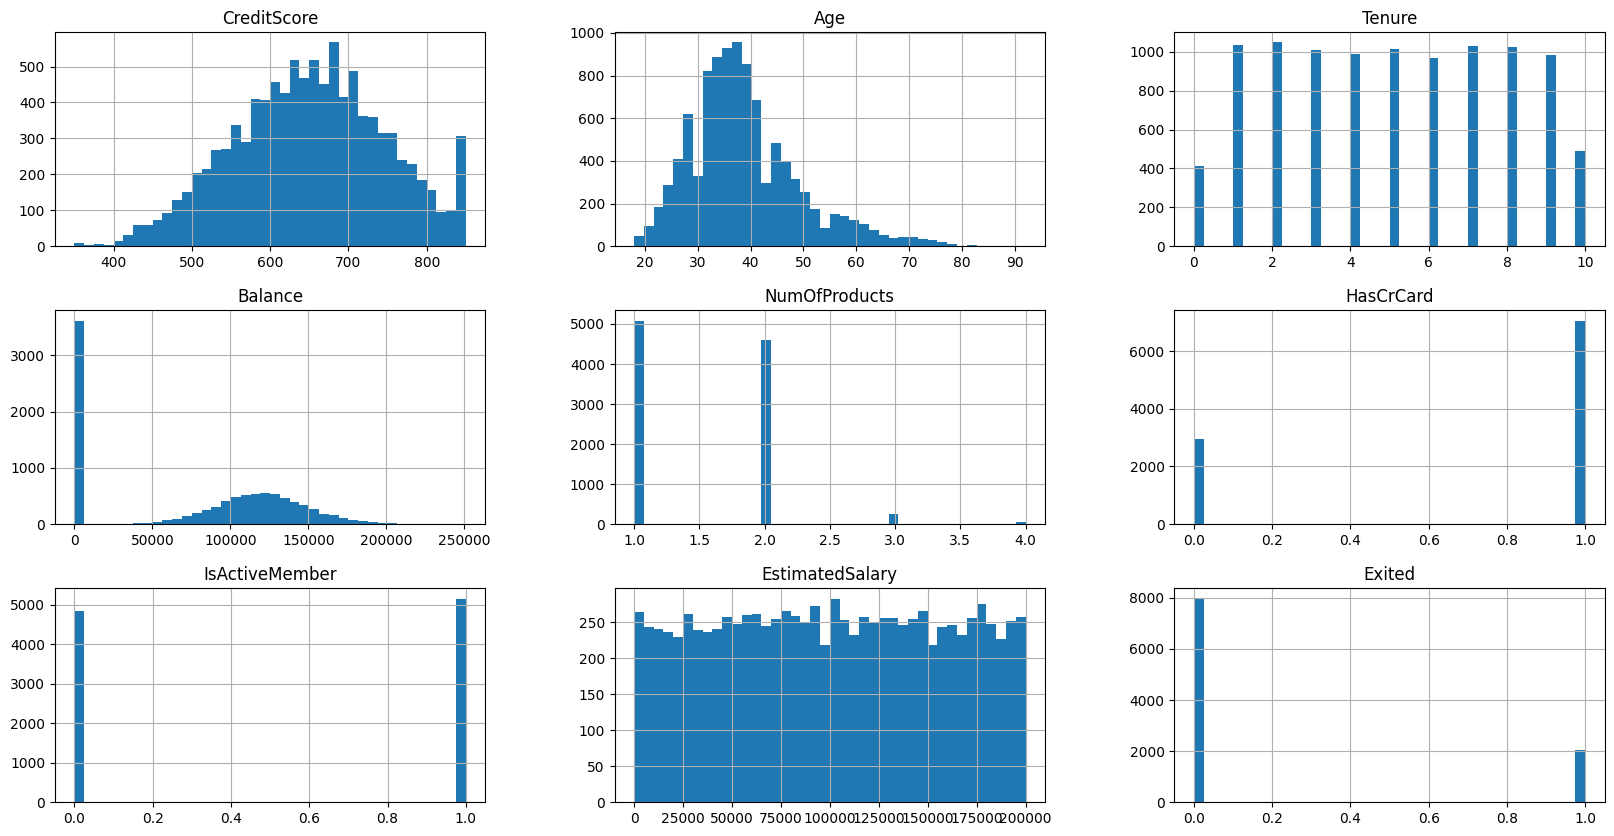

In [11]:
df.hist(bins=40, figsize=(20, 10))  # before handling Age column
plt.show()

In [12]:
# Handle Outliers
df.drop(index=df[df['Age'] > 80].index.tolist(), axis=0, inplace=True)

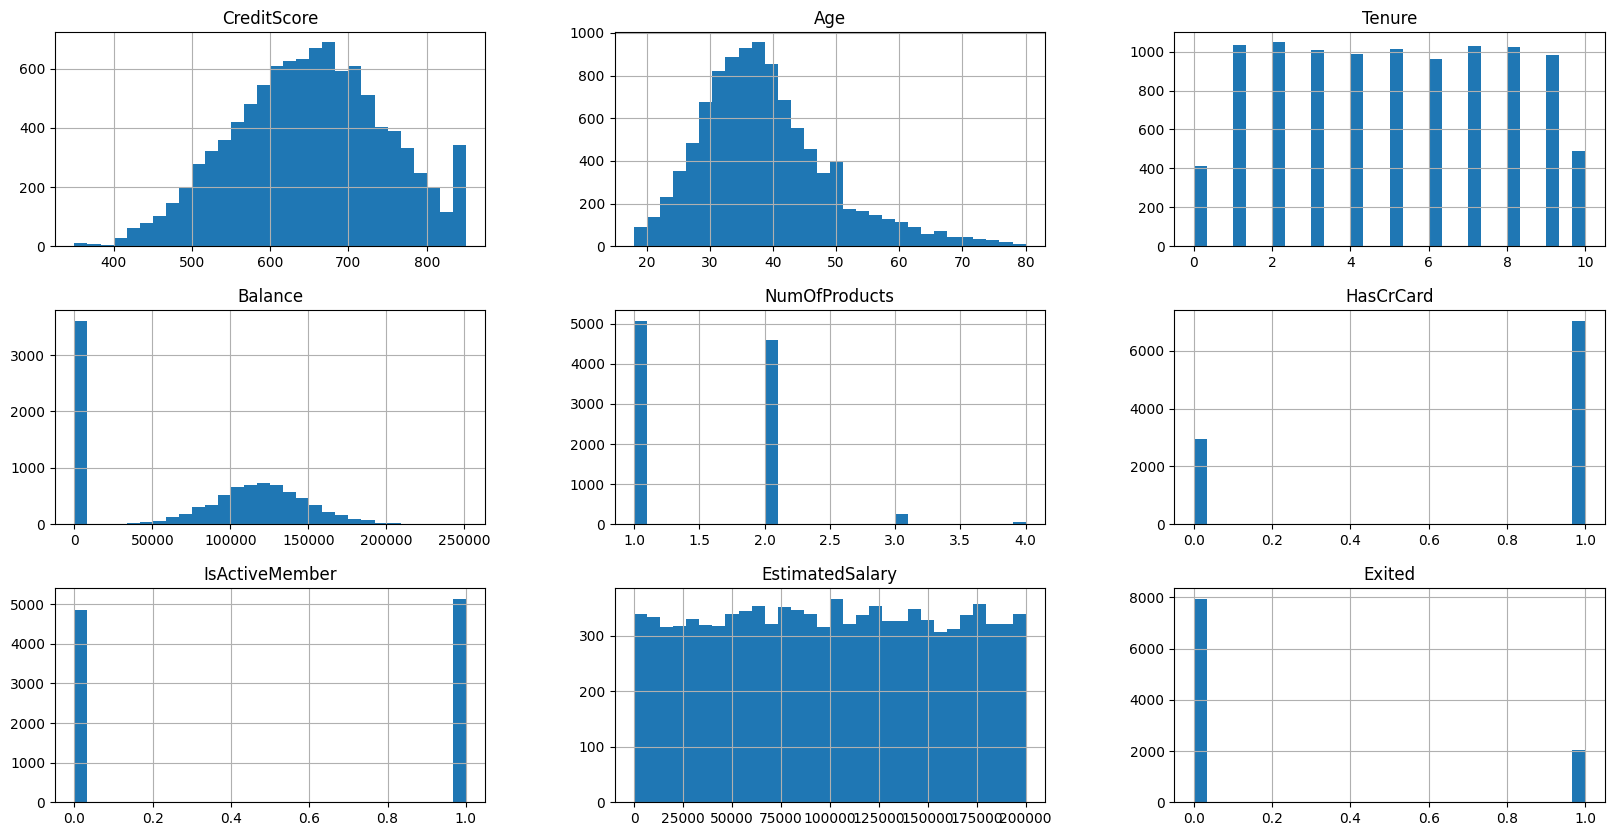

In [13]:
df.hist(bins=30, figsize=(20, 10))  # after handling Age column
plt.show()

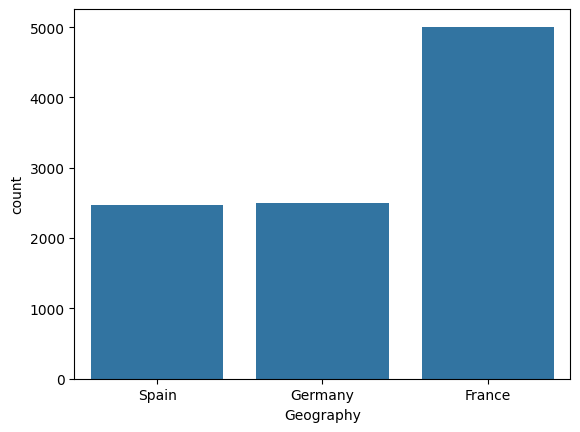

In [14]:
# countplot
sns.countplot(data=df, x='Geography', order=df['Geography'].value_counts(ascending=True).index.tolist())
plt.show()

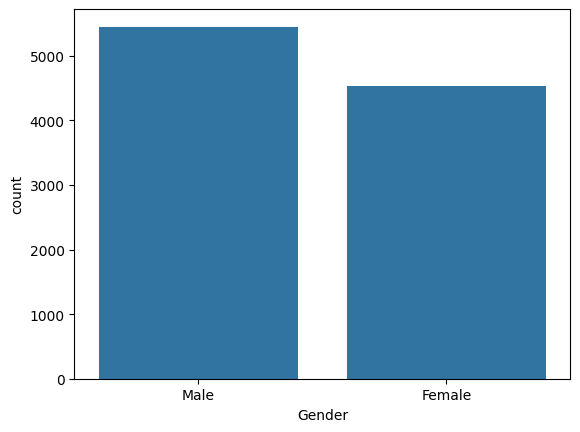

In [15]:
# counplot for Gender
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index.tolist())  ## title, xlabel, ylabel
plt.show()

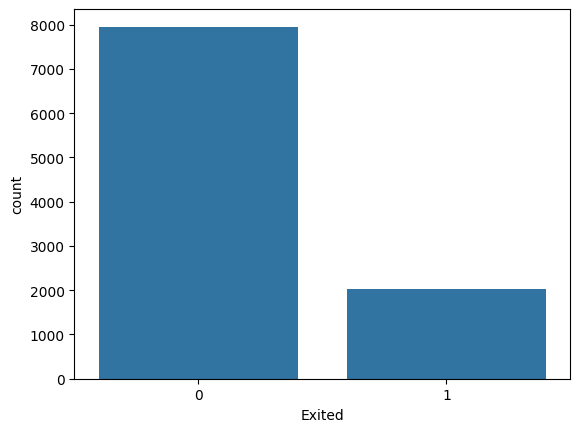

In [16]:
# counplot for Exited
sns.countplot(data=df, x='Exited', order=df['Exited'].value_counts().index.tolist())  ## title, xlabel, ylabel
plt.show()

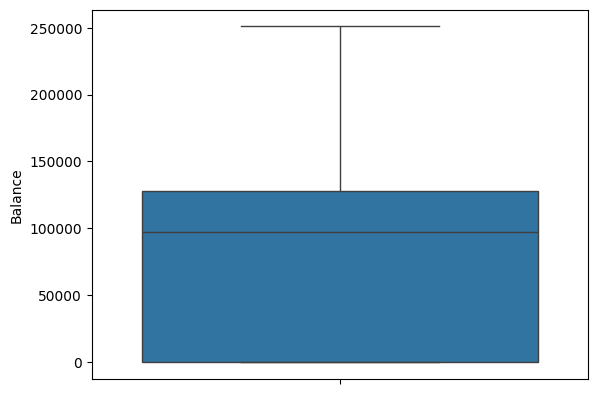

In [17]:
sns.boxplot(data=df, y='Balance')
plt.show()

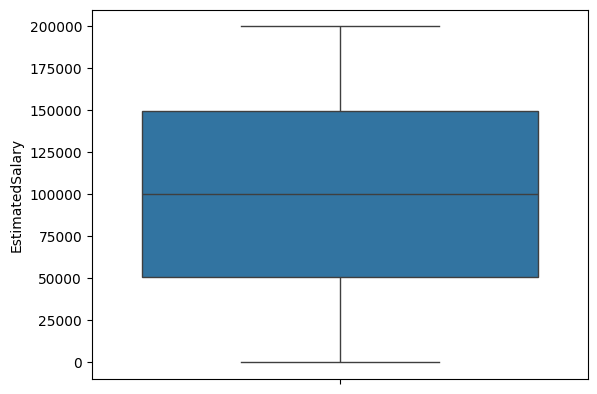

In [18]:
# Boxplot for (EstimatedSalary)
sns.boxplot(data=df, y='EstimatedSalary')
plt.show()

* `BiVariate Viz`

In [19]:
# Average Salary per Gender
df[['Gender', 'EstimatedSalary']].groupby('Gender')['EstimatedSalary'].mean()

Gender
Female    100575.998277
Male       99671.901194
Name: EstimatedSalary, dtype: float64

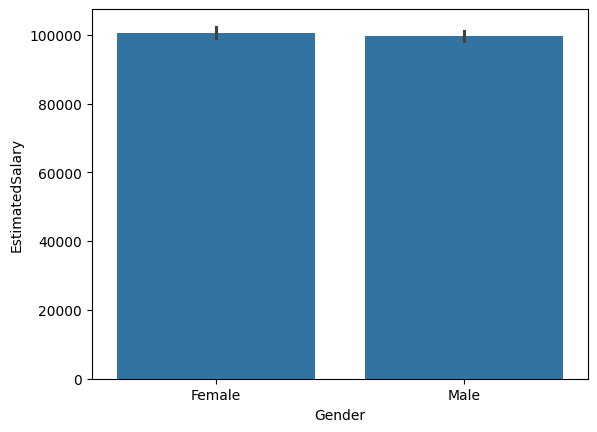

In [20]:
# Average Salary per Gender using barplot
sns.barplot(data=df, x='Gender', y='EstimatedSalary', estimator='mean')
plt.show()

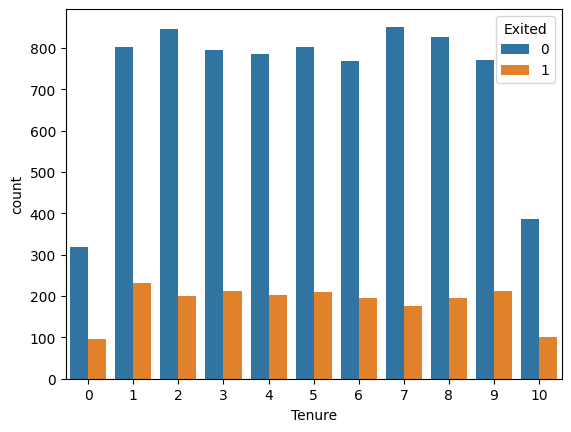

In [21]:
# Realation between Tenure and Exited
sns.countplot(data=df, x='Tenure', hue='Exited')
plt.show()

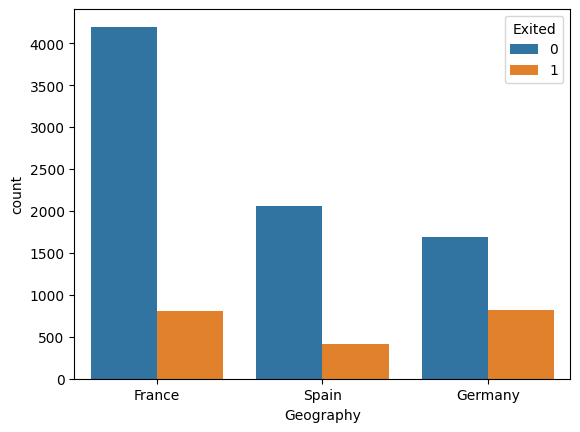

In [22]:
# Geography with Exited
sns.countplot(data=df, x='Geography', hue='Exited')
plt.show()

----

* `Splitting Dataset to train & test`

In [23]:
# Split X & y
X = df.drop(columns=['Exited'], axis=1)
y = df['Exited']

y.value_counts(normalize=True)

Exited
0    0.796155
1    0.203845
Name: proportion, dtype: float64

In [24]:
# Split to train & test folds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45, shuffle=True, stratify=y)

## Check shapes
print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (8489, 10)
y_train.shape 	 (8489,)
******************************
X_test.shape 	 (1499, 10)
y_test.shape 	 (1499,)


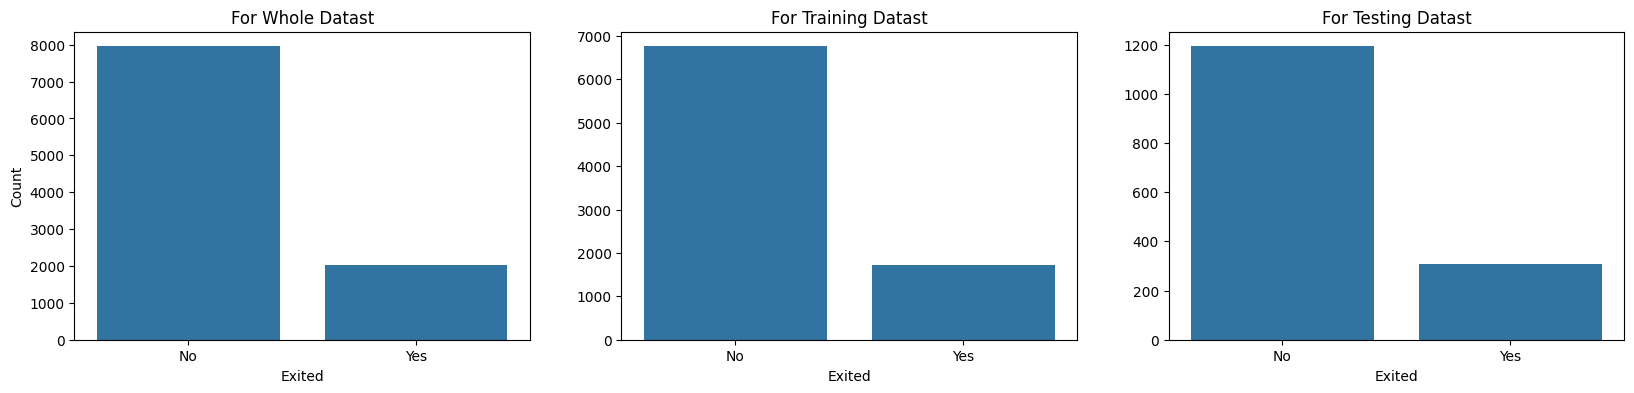

In [25]:
## plottting to check
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

## Whole dataset
plt.sca(ax[0])
sns.countplot(x=y)
plt.title('For Whole Datast')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

## train
plt.sca(ax[1])
sns.countplot(x=y_train)
plt.title('For Training Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

## test
plt.sca(ax[2])
sns.countplot(x=y_test)
plt.title('For Testing Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

-----

* `Data Preprocessing & Pipeline`

In [65]:
X_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [64]:
# Slice lists for each col type
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
categ_cols = ['Geography', 'Gender']
ready_cols = list(set(X_train.columns.tolist()) - set(num_cols) - set(categ_cols))
ready_cols

['Tenure', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']

In [ ]:
# Pipeline

# Numerical: num_cols --> Imputing using median, and StandardScaler
# Categorical: categ_cols --> Imputing using mode, and OHE
# Ready Cols: ready_cols --> Imputing mode


# For Numerical
num_pipeline = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())
                ])


# For Categorical
categ_pipeline = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='most_frequent')),
                    ('ohe', OneHotEncoder(sparse_output=False, drop='first'))
                ])


# For Ready Cols
ready_pipeline = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='most_frequent'))
                ])



# Combine all secondary pipelines into one total pipeline
all_pipeline = ColumnTransformer(transformers=[
                    ('numerical', num_pipeline, num_cols),
                    ('categorical', categ_pipeline, categ_cols),
                    ('ready', ready_pipeline, ready_cols)
                ])


# Apply
X_train_final = all_pipeline.fit_transform(X_train)
X_test_final = all_pipeline.transform(X_test)

In [28]:
# If you want to see the processed array
output_cols = num_cols + all_pipeline.named_transformers_['categorical'].named_steps['ohe'].get_feature_names_out(categ_cols).tolist() + ready_cols

pd.DataFrame(X_train_final, columns=output_cols)

,CreditScore,Age,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Tenure,HasCrCard,IsActiveMember,NumOfProducts
0,0.807073,0.304402,0.347474,-1.702208,1.0,0.0,0.0,4.0,0.0,0.0,2.0
1,-0.276284,-1.042771,-1.218600,0.077555,0.0,1.0,0.0,2.0,0.0,1.0,2.0
2,0.280871,-0.850318,1.025030,-1.456269,1.0,0.0,0.0,1.0,0.0,1.0,2.0
3,0.569766,0.689309,0.569021,0.856872,1.0,0.0,0.0,7.0,1.0,1.0,1.0
4,0.167377,-0.754091,0.379891,1.560895,0.0,0.0,1.0,3.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8484,-0.864392,0.208176,0.996348,0.732354,0.0,0.0,0.0,9.0,1.0,0.0,1.0
8485,-1.256464,-0.946545,-1.218600,-1.391998,0.0,0.0,0.0,8.0,1.0,0.0,2.0
8486,-0.523909,1.747803,1.005418,0.063557,1.0,0.0,1.0,9.0,1.0,1.0,2.0
8487,-0.833439,-0.176731,-1.218600,1.527878,0.0,0.0,1.0,6.0,1.0,1.0,1.0


In [29]:
# Check train
X_train_final.shape, y_train.shape

((8489, 11), (8489,))

In [30]:
# Check test
X_test_final.shape, y_test.shape

((1499, 11), (1499,))

In [31]:
# Dump the pipeline locally in ARTIFACTS_FOLDER_PATH
ARTIFACTS_FOLDER_PATH = os.path.join(os.getcwd(), '..', 'artifacts')
os.makedirs(ARTIFACTS_FOLDER_PATH, exist_ok=True)

In [32]:
# Dump the pipeline locally --> Serialzation
joblib.dump(all_pipeline, os.path.join(ARTIFACTS_FOLDER_PATH, 'pipeline.pkl'))

['c:\\Users\\moham\\Desktop\\ML - M.T.F\\02- Code\\Live Churn - Monday\\notebooks\\..\\artifacts\\pipeline.pkl']

------

* `Dealing with Imbalancing Data`

In [33]:
# 1. Wihtout Considering any solution for dealing with imbalanced data --- (X_train_final, y_train)

# 2. Use class_weight for solving imbalanced weight                 --- (X_train_final, y_train) & model class_weigth=dict_weights
vals_count = 1 - (np.bincount(y_train) / len(y_train))
vals_count = vals_count / np.sum(vals_count)
dict_weights = {}
for i in range(2):  # 2 classes (0, 1)
    dict_weights[i] = vals_count[i]

In [34]:
# 3. Consider using oversampling using SMOTE   --- (X_train_resampeld, y_train_resampled)
over = SMOTE(sampling_strategy=0.65)
X_train_resampeld, y_train_resampled = over.fit_resample(X_train_final, y_train)

---

* `Building Models`
> Evaluation Metric is F1-Score

* `Logistic Regression`

In [35]:
# 1. Using logisit -- without considering the imabalancing data
log_clf = LogisticRegression(C=1.5, penalty='l2')
log_clf.fit(X_train_final, y_train)

# Predict and evalute
y_pred_train_log = log_clf.predict(X_train_final)
y_pred_test_log = log_clf.predict(X_test_final)

# F1-Score
f1_train_log = f1_score(y_train, y_pred_train_log)
f1_test_log = f1_score(y_test, y_pred_test_log)


print(f'The f1_score using Logistic model for Training Dataset is: {f1_train_log*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset is: {f1_test_log*100:.3f}')

The f1_score using Logistic model for Training Dataset is: 30.246
The f1_score using Logistic model for Testing Dataset is: 39.623


In [36]:
# 2. Using logisit -- with considering the imabalancing data using class_weights
log_clf = LogisticRegression(C=1.5, penalty='l2', class_weight=dict_weights)
log_clf.fit(X_train_final, y_train)

# Predict and evalute
y_pred_train_log = log_clf.predict(X_train_final)
y_pred_test_log = log_clf.predict(X_test_final)

# F1-Score
f1_train_log = f1_score(y_train, y_pred_train_log)
f1_test_log = f1_score(y_test, y_pred_test_log)

print(f'The f1_score using Logistic model for Training Dataset with class_weigths is {f1_train_log*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset with class_weigths is {f1_test_log*100:.3f}')

The f1_score using Logistic model for Training Dataset with class_weigths is 49.804
The f1_score using Logistic model for Testing Dataset with class_weigths is 49.718


In [37]:
# 3. Using logisit -- with considering the imabalancing data using oversampled data (SMOTE)
log_clf = LogisticRegression(C=1.5, penalty='l2')
log_clf.fit(X_train_resampeld, y_train_resampled)

# Predict and evalute
y_pred_train_log = log_clf.predict(X_train_final)
y_pred_test_log = log_clf.predict(X_test_final)

# F1-Score
f1_train_log = f1_score(y_train, y_pred_train_log)
f1_test_log = f1_score(y_test, y_pred_test_log)


print(f'The f1_score using Logistic model for Training Dataset with SMOTE is {f1_train_log*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset with SMOTE is {f1_test_log*100:.3f}')

The f1_score using Logistic model for Training Dataset with SMOTE is 48.755
The f1_score using Logistic model for Testing Dataset with SMOTE is 51.765


In [38]:
# Dump this model locally
joblib.dump(log_clf, os.path.join(ARTIFACTS_FOLDER_PATH, 'logistic-with-smote.pkl'), compress=9)

['c:\\Users\\moham\\Desktop\\ML - M.T.F\\02- Code\\Live Churn - Monday\\notebooks\\..\\artifacts\\logistic-with-smote.pkl']

---

* `RandomForestClassifier`

In [39]:
# 2. Using class_weight
forest_clf = RandomForestClassifier(criterion='gini', n_estimators=150, 
                                    max_depth=5, random_state=45, class_weight=dict_weights)
forest_clf.fit(X_train_final, y_train)

# Predict and evaluate
y_pred_train_forest = forest_clf.predict(X_train_final)
y_pred_test_foerst = forest_clf.predict(X_test_final)

# Using f1_score
f1_train_forest = f1_score(y_train, y_pred_train_forest)
f1_test_forest = f1_score(y_test, y_pred_test_foerst)

print(f'The f1_score using RF model for Training Dataset with class_weights is {f1_train_forest*100:.3f}')
print(f'The f1_score using RF model for Testing Dataset with class_weights is {f1_test_forest*100:.3f}')

The f1_score using RF model for Training Dataset with class_weights is 59.347
The f1_score using RF model for Testing Dataset with class_weights is 58.511


In [40]:
# 3. Using SMOTE
forest_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45)
forest_clf.fit(X_train_resampeld, y_train_resampled)

# Predict and evaluate
y_pred_train_forest = forest_clf.predict(X_train_final)
y_pred_test_foerst = forest_clf.predict(X_test_final)

# Using f1_score
f1_train_forest = f1_score(y_train, y_pred_train_forest)
f1_test_forest = f1_score(y_test, y_pred_test_foerst)

print(f'The f1_score using RF model for Training Dataset with SMOTE is {f1_train_forest*100:.3f}')
print(f'The f1_score using RF model for Testing Dataset with SMOTE is {f1_test_forest*100:.3f}')

The f1_score using RF model for Training Dataset with SMOTE is 60.403
The f1_score using RF model for Testing Dataset with SMOTE is 59.643


* `Tuning RF using GridSearchCV`

In [41]:
# Using GridSearchCV with class_weight
forest_clf = RandomForestClassifier(n_estimators=150, max_depth=5, 
                                    max_features=0.8, random_state=45, class_weight=dict_weights)

# Params to search in
params_best_grid = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': np.arange(2, 10, 2)
}

# GridSearchCV
grid_forest = GridSearchCV(estimator=forest_clf, param_grid=params_best_grid, cv=5, scoring='f1', verbose=4)
grid_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......max_depth=2, n_estimators=50;, score=0.516 total time=   0.3s
[CV 2/5] END ......max_depth=2, n_estimators=50;, score=0.548 total time=   0.2s
[CV 3/5] END ......max_depth=2, n_estimators=50;, score=0.505 total time=   0.2s
[CV 4/5] END ......max_depth=2, n_estimators=50;, score=0.505 total time=   0.2s
[CV 5/5] END ......max_depth=2, n_estimators=50;, score=0.508 total time=   0.2s
[CV 1/5] END .....max_depth=2, n_estimators=100;, score=0.516 total time=   0.6s
[CV 2/5] END .....max_depth=2, n_estimators=100;, score=0.548 total time=   0.6s
[CV 3/5] END .....max_depth=2, n_estimators=100;, score=0.505 total time=   0.5s
[CV 4/5] END .....max_depth=2, n_estimators=100;, score=0.505 total time=   0.6s
[CV 5/5] END .....max_depth=2, n_estimators=100;, score=0.508 total time=   0.5s
[CV 1/5] END .....max_depth=2, n_estimators=150;, score=0.516 total time=   0.9s
[CV 2/5] END .....max_depth=2, n_estimators=150;

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: np.float64(0.2037931440687949),
                                                            1: np.float64(0.7962068559312051)},
                                              max_depth=5, max_features=0.8,
                                              n_estimators=150,
                                              random_state=45),
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([ 50, 100, 150])},
             scoring='f1', verbose=4)

In [42]:
# The best score according to your scoring
grid_forest.best_score_

np.float64(0.6103506497268525)

In [43]:
grid_forest.best_params_

{'max_depth': np.int64(8), 'n_estimators': np.int64(100)}

In [44]:
# The forest after tuning
forest_tuned = grid_forest.best_estimator_
forest_tuned.fit(X_train_final, y_train)

# Predict and evaluate
y_pred_train_forest_tuned = forest_tuned.predict(X_train_final)
y_pred_test_foerst_tuned = forest_tuned.predict(X_test_final)

# Using f1_score
score_train_forest_tuned = f1_score(y_train, y_pred_train_forest_tuned)
score_test_forest_tuned = f1_score(y_test, y_pred_test_foerst_tuned)

print(f'The f1_score using tuned RF model for Training Dataset with class_weigths is {score_train_forest_tuned*100:.3f}')
print(f'The f1_score using tuned RF model for Testing Dataset with class_weigths is {score_test_forest_tuned*100:.3f}')

The f1_score using tuned RF model for Training Dataset with class_weigths is 69.532
The f1_score using tuned RF model for Testing Dataset with class_weigths is 63.764


In [45]:
# Dump this model locally
joblib.dump(log_clf, os.path.join(ARTIFACTS_FOLDER_PATH, 'forest-tuned-class_weights.pkl'), compress=9)

['c:\\Users\\moham\\Desktop\\ML - M.T.F\\02- Code\\Live Churn - Monday\\notebooks\\..\\artifacts\\forest-tuned-class_weights.pkl']

In [63]:
df_importances = pd.DataFrame({'col': output_cols, 'importance': forest_tuned.feature_importances_})
df_importances.sort_values(by='importance', ascending=False)

,col,importance
1,Age,0.377625
10,NumOfProducts,0.242855
2,Balance,0.132652
9,IsActiveMember,0.062032
3,EstimatedSalary,0.051937
4,Geography_Germany,0.043308
0,CreditScore,0.042951
7,Tenure,0.022936
6,Gender_Male,0.014719
8,HasCrCard,0.004678


----

* `XGBoost`

In [50]:
# Foe dealing with imbalanced data using XGBoost
scale = np.bincount(y_train)[0] / np.bincount(y_train)[1]

In [53]:
# Using xgboost
xgb_clf = XGBClassifier(objective='binary:logistic', 
                        n_estimators=150, max_depth=3, scale_pos_weight=scale)
xgb_clf.fit(X_train_final, y_train)

# Predict and evaluate
y_pred_train_xgb = xgb_clf.predict(X_train_final)
y_pred_test_xgb = xgb_clf.predict(X_test_final)

# Using f1_score
score_train_xgb= f1_score(y_train, y_pred_train_xgb)
score_test_xgb = f1_score(y_test, y_pred_test_xgb)

print(f'The f1_score using XGBoost model for Training Dataset with class_weigths is {score_train_xgb*100:.3f}')
print(f'The f1_score using XGBoost model for Testing Dataset with class_weigths is {score_test_xgb*100:.3f}')

The f1_score using XGBoost model for Training Dataset with class_weigths is 69.947
The f1_score using XGBoost model for Testing Dataset with class_weigths is 63.342


---